In [496]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score

In [497]:
red = pd.read_csv('winequality-red.csv',  sep=';')
white = pd.read_csv('winequality-white.csv', sep=';')

In [498]:
print(red.shape)
red.head()


(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [499]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [500]:
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [501]:
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [502]:
print("The Red wine dataset has", red.shape[0], "number of observations and", 
      red.shape[1], "variables")
print("The White wine dataset has", white.shape[0], "number of observations and",
      white.shape[1], "variables")

The Red wine dataset has 1599 number of observations and 12 variables
The White wine dataset has 4898 number of observations and 12 variables


# DATA PROCESSING


In [503]:
# there are many dupicates in data frame first we have to drop those duplicates
import random
red.drop_duplicates(inplace=True)
red.shape
# function for splitting dataset into training and testing data
def split_train_test(data, test_ratio):
   shuffled_indices = np.random.permutation(len(data))
   test_set_size = int(len(data) * test_ratio)
   test_indices = shuffled_indices[:test_set_size]
   train_indices = shuffled_indices[test_set_size:]
   return data.iloc[train_indices], data.iloc[test_indices]

train,test=split_train_test(red,0.2)
print(train.shape)
print(test.shape)

(1088, 12)
(271, 12)


In [504]:
#corelation  matrix between variable
corr_matrix=train.corr()
corr_quality=corr_matrix["quality"]
print(corr_quality)

highly_corelated_features = []
for i in range(len(corr_quality)-1):
    if corr_quality[i]>0.2 or corr_quality[i]<-0.2:
       k=corr_quality.index[i]
       highly_corelated_features.append(k)
        


fixed acidity           0.110425
volatile acidity       -0.381305
citric acid             0.225227
residual sugar         -0.015102
chlorides              -0.123326
free sulfur dioxide    -0.051835
total sulfur dioxide   -0.168540
density                -0.199384
pH                     -0.054424
sulphates               0.236798
alcohol                 0.472333
quality                 1.000000
Name: quality, dtype: float64


In [505]:
highly_corelated_features

['volatile acidity', 'citric acid', 'sulphates', 'alcohol']

In [506]:
x_red_corr=train[highly_corelated_features]
print(x_red_corr.shape)
y_train=train["quality"]
y_train.shape

(1088, 4)


(1088,)

In [507]:
# scaling the data using mean normalisation technique
x_red_corr=(x_red_corr-x_red_corr.mean())/x_red_corr.std()
x_red_corr.shape

(1088, 4)

In [508]:
# concating column of values having 1 for theta_zero
x_ones=np.ones([x_red_corr.shape[0],1])
X=np.concatenate((x_ones,x_red_corr),axis=1)
X.shape




(1088, 5)

In [509]:
theta=np.random.randn(X.shape[1])

alpha=0.01
iterations=1000
theta_history=np.zeros((iterations,5))
cost_list=np.zeros(iterations)




# cost function

In [510]:
def cost(X,y,theta):
     cost_array = np.power(((X.dot(theta.T))-y),2)
     cost_value=(np.sum(cost_array))/(2*len(X))
     return cost_value


# gradient descendent

In [511]:
def gradient_descendent(x,y,theta,alpha,iterations) :
     cost_array = np.zeros(iterations)
     for i in range(iterations):
        theta = theta - (alpha/len(x)) *( (x.dot(theta.T) - y).T).dot(x)
        theta_history[i, :]=theta
        cost_list[i] = cost(x,y, theta)
    
     return theta_history,theta,cost_list
theta_history,theta_,cost_list=gradient_descendent(X,y_train,theta,alpha,iterations)
print(theta_)
    

[ 5.61834483e+00 -2.27090241e-01 -3.89015137e-03  1.09470978e-01
  3.38171505e-01]


Text(0.5, 1.0, 'Error vs. Training Epoch')

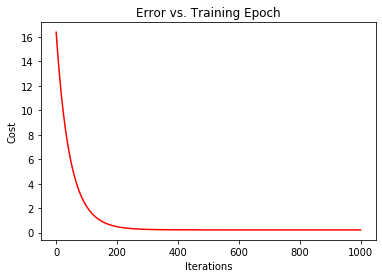

In [512]:


fig, ax = plt.subplots()  
ax.plot(np.arange(iterations), cost_list, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')  



In [513]:
theta_history

array([[ 5.42719596e-01,  1.36170155e+00, -4.38765466e-01,
        -3.00448153e-01, -9.35744064e-01],
       [ 5.93478062e-01,  1.34023319e+00, -4.23168315e-01,
        -2.90020703e-01, -9.19638873e-01],
       [ 6.43728943e-01,  1.31911906e+00, -4.07894092e-01,
        -2.79812913e-01, -9.03752589e-01],
       ...,
       [ 5.61834034e+00, -2.27032721e-01, -3.83018400e-03,
         1.09461754e-01,  3.38179983e-01],
       [ 5.61834260e+00, -2.27061542e-01, -3.86023122e-03,
         1.09466374e-01,  3.38175737e-01],
       [ 5.61834483e+00, -2.27090241e-01, -3.89015137e-03,
         1.09470978e-01,  3.38171505e-01]])

# Prediction on test data_set


In [534]:
test.shape
x_test=test[highly_corelated_features]
print(x_test.shape)
x_test = (x_test-x_test.mean())/x_test.std()
x_test
x_test.shape
x_ones_test=np.ones([x_test.shape[0],1])

X_test=np.concatenate((x_ones_test,x_test),axis=1)
X_test.shape
y_test=test["quality"]
y_test
y_pred_red = X_test.dot(theta_.T)
y_pred_red

print(y_test_mean)
#y_pred_red
sse= np.sum(np.power((y_pred_red-y_test),2))
print("mean square error is",sse/len(X_test))
sst=np.sum(np.power((y_test-y_test_mean),2))
print("r-squared value:",1-(sse/sst))

(271, 4)
5.642066420664206
mean square error is 0.452904062254794
r-squared value: 0.38099290512423545


# White wine data set


In [544]:
white.drop_duplicates(inplace=True)
print(white.shape)
train_white,test_white=split_train_test(white,0.2)
print(train_white.shape)
print(test_white.shape)

(3961, 12)
(3169, 12)
(792, 12)


In [545]:
#corelation  matrix between variable
corr_matrix_white=train_white.corr()
corr_quality_white=corr_matrix_white["quality"]
print(corr_quality_white)

highly_corelated_features_white = []
for i in range(len(corr_quality_white)-1):
    if corr_quality_white[i]>0.2 or corr_quality_white[i]<-0.2:
       k=corr_quality_white.index[i]
       highly_corelated_features_white.append(k)
        


fixed acidity          -0.134551
volatile acidity       -0.189958
citric acid             0.005874
residual sugar         -0.116766
chlorides              -0.216742
free sulfur dioxide     0.016526
total sulfur dioxide   -0.171264
density                -0.339370
pH                      0.129950
sulphates               0.047880
alcohol                 0.468025
quality                 1.000000
Name: quality, dtype: float64


In [546]:
highly_corelated_features_white

['chlorides', 'density', 'alcohol']

In [547]:
x_white_corr=train_white[highly_corelated_features_white]
print(x_white_corr.shape)
y_train_white=train_white["quality"]
y_train_white.shape

(3169, 3)


(3169,)

In [548]:
# scaling the data using mean normalisation technique
x_white_corr=(x_white_corr-x_white_corr.mean())/x_white_corr.std()
x_white_corr
x_white_corr.shape

(3169, 3)

In [549]:
# concating column of values having 1 for theta_zero
x_ones_white=np.ones([x_white_corr.shape[0],1])
X_white=np.concatenate((x_ones_white,x_white_corr),axis=1)
X_white.shape




(3169, 4)

In [550]:
theta_white_=np.random.randn(X_white.shape[1])

alpha=0.01
iterations_white=1000
theta_history_white=np.zeros((iterations,4))
cost_list_white=np.zeros(iterations_white)



In [551]:
def gradient_descendent_white(x,y,theta,alpha,iterations) :
     cost_array = np.zeros(iterations)
     for i in range(iterations):
        theta = theta - (alpha/len(x)) *( (x.dot(theta.T) - y).T).dot(x)
        cost_list_white[i] = cost(x,y, theta)
    
     return theta,cost_list
theta_white_,cost_list_white=gradient_descendent_white(X_white,y_train_white,theta_white,alpha,iterations_white)
print(theta_white_)
#print(cost_list_white)


[ 5.85503875 -0.0575524  -0.00653267  0.38796022]


In [552]:
test_white.shape
x_test_white=test_white[highly_corelated_features_white]
print(x_test_white.shape)
x_test_white = (x_test_white-x_test_white.mean())/x_test_white.std()
x_test_white
x_test_white.shape
x_ones_test_white=np.ones([x_test_white.shape[0],1])

X_test_white=np.concatenate((x_ones_test_white,x_test_white),axis=1)
X_test_white.shape
y_test_white=test_white["quality"]
y_test_white
y_pred_white = X_test_white.dot(theta_white.T)
y_pred_white
y_test_mean_white= y_test_white.mean()

#y_pred_red
sse_white= np.sum(np.power((y_pred_white-y_test_white),2))
print(sse_white)
print("mean square error is",sse/len(X_test_white))


(792, 3)
11185.203519361528
mean square error is 0.15497096069576916
